In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,mean_absolute_error, mean_squared_error, r2_score




In [22]:
df= pd.read_csv("heart_disease.csv")
df

# age: Age of the individual
# sex: Gender of the individual (0 = female, 1 = male)
# chest pain type: Type of chest pain (4 categories: 0-3)
# resting blood pressure: Resting blood pressure (in mm Hg)
# serum cholesterol: Cholesterol level (in mg/dl)
# fasting blood sugar: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
# resting electrocardiographic results: ECG results (0 = normal, 1 = ST-T abnormality, 2 = probable/definite left ventricular hypertrophy)
# maximum heart rate achieved
# exercise induced angina: Exercise-induced chest pain (1 = yes, 0 = no)
# oldpeak: ST depression induced by exercise relative to rest
# slope: The slope of the peak exercise ST segment (0-2)
# number of major vessels: Number of major vessels (0-3) colored by fluoroscopy
# thal: Type of thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect)
# target: Presence of heart disease (1 = Yes, 0 = No)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# splitting data into numerical and categorical data

num_df=df[['age','trestbps','chol','thalach','oldpeak']]
cat_df=df[['sex','cp','fbs','restecg','exang','slope','ca','thal']]
target=df[['target']]

In [5]:
print(num_df.sort_values(by='age'))
print(num_df.sort_values(by='trestbps'))
print(num_df.sort_values(by='chol'))
print(num_df.sort_values(by='thalach'))
print(num_df.sort_values(by='oldpeak'))

     age  trestbps  chol  thalach  oldpeak
60    29       130   204      202      0.0
118   29       130   204      202      0.0
668   29       130   204      202      0.0
64    29       130   204      202      0.0
572   34       118   182      174      0.0
..   ...       ...   ...      ...      ...
99    76       140   197      116      1.1
965   76       140   197      116      1.1
160   77       125   304      162      0.0
162   77       125   304      162      0.0
387   77       125   304      162      0.0

[1025 rows x 5 columns]
     age  trestbps  chol  thalach  oldpeak
223   39        94   199      179      0.0
301   51        94   227      154      0.0
732   51        94   227      154      0.0
704   51        94   227      154      0.0
558   39        94   199      179      0.0
..   ...       ...   ...      ...      ...
326   54       192   283      195      0.0
508   56       200   288      133      4.0
294   56       200   288      133      4.0
688   56       200   288     

Under initial superficial analysis there doesnt seem to exsit any outliers in the numerical data.


# DATA CLEANING & PREPROCESSING

1. HANDLING MSSING DATA

In [ ]:
num_df.isna().sum()

# no missing data detected in numerical data

,0
age,0
trestbps,0
chol,0
thalach,0
oldpeak,0


In [ ]:
cat_df.isna().sum()

# no missing data detected in categorical data

,0
sex,0
cp,0
fbs,0
restecg,0
exang,0
slope,0
ca,0
thal,0


In [ ]:
target.isna().sum()
#no missing data in target variable data

,0
target,0


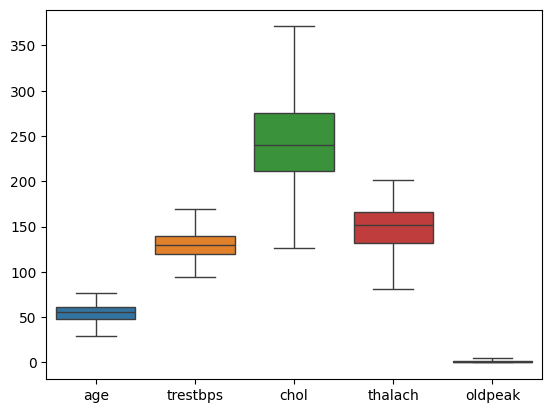

In [34]:
sns.boxplot(num_df)
plt.show()

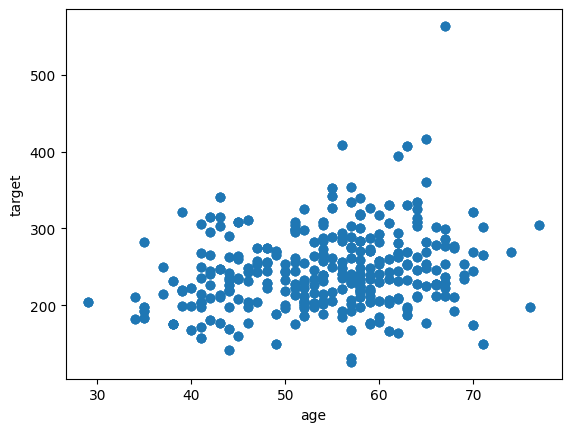

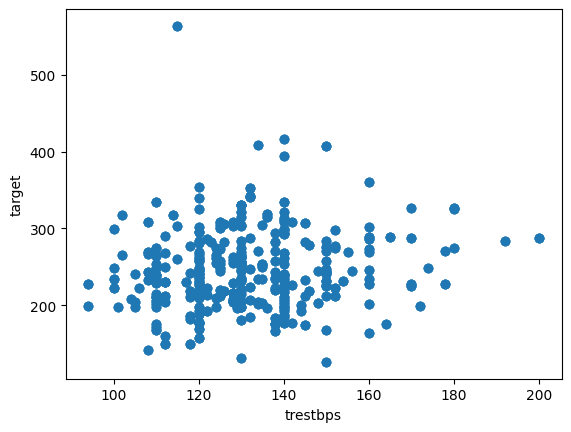

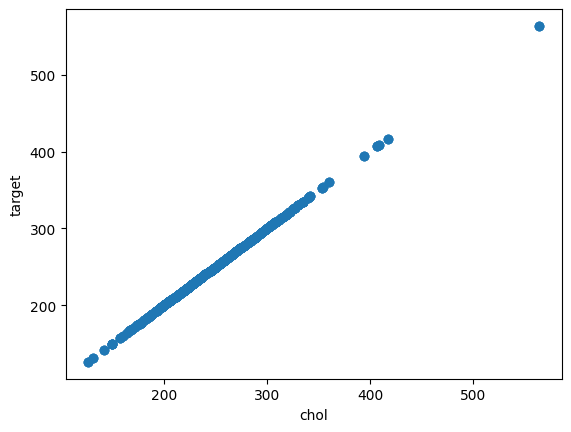

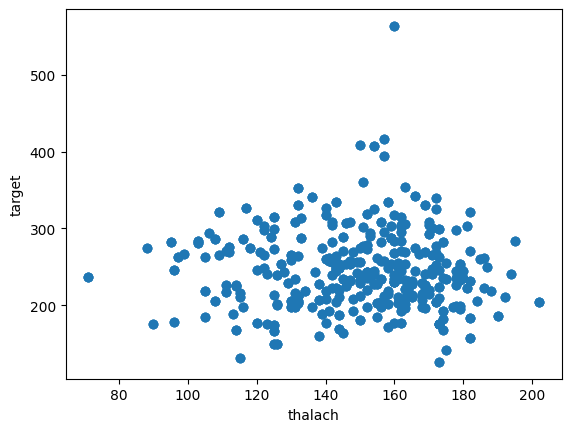

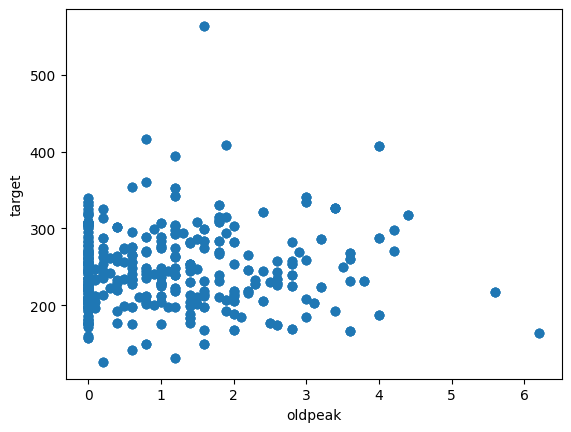

In [38]:
for i in df[['age','trestbps','chol','thalach','oldpeak']].columns:
  plt.scatter(df[i],df['chol'])
  plt.xlabel(i)
  plt.ylabel('target')
  plt.show()

since trestbps, chol, thalach & oldpeak seems to have outliers, lets plot the data to see if the outliers are significantly in the outskirts of the trend using scatter plot

2. outliers

In [ ]:
outliers=pd.DataFrame()
def replace_outliers(df,col_name):
    q1= df[col_name].quantile(0.25)
    q3=df[col_name].quantile(0.75)
    iqr=q3-q1
    up_bound= q3 + 1.5*iqr
    low_bound= q1 - 1.5* iqr

    outliers = df[(df[col_name] < low_bound) | (df[col_name] > up_bound)]
    df[col_name].clip(upper=up_bound,inplace=True)
    df[col_name].clip(lower=low_bound,inplace=True)
    #print(f"\n{col_name}\n",outliers[col_name])
    return df[col_name],outliers[col_name]

for col in num_df.columns:
    num_df[col],col=replace_outliers(num_df,col)
    outliers=pd.concat([outliers,col],axis=1)

<ipython-input-32-89762b1de739>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col_name].clip(upper=up_bound,inplace=True)
<ipython-input-32-89762b1de739>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name].clip(upper=up_bound,inplace=True)
<ipython-input-32-89762b1de739>:11: FutureWarning: A value is trying to be set on a cop

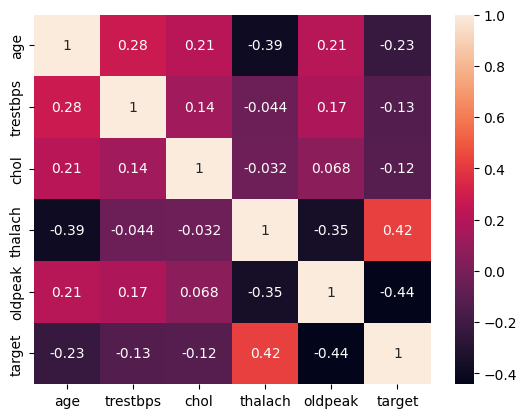

In [54]:
sns.heatmap(pd.concat([num_df,target],axis=1).corr(), annot=True)
plt.show()



In [11]:
# ensuring that cat data only has the designated categories to skip encoding
print(pd.unique(cat_df['sex']))
print(pd.unique(cat_df['cp']))
print(pd.unique(cat_df['fbs']))
print(pd.unique(cat_df['restecg']))
print(pd.unique(cat_df['exang']))
print(pd.unique(cat_df['slope']))
print(pd.unique(cat_df['ca']))
print(pd.unique(cat_df['thal']))

[1 0]
[0 1 2 3]
[0 1]
[1 0 2]
[0 1]
[2 0 1]
[2 0 1 3 4]
[3 2 1 0]


In [12]:
print(len(cat_df[cat_df['thal']==3]))
print(len(cat_df[cat_df['thal']==2]))
print(len(cat_df[cat_df['thal']==1]))
print(len(cat_df[cat_df['thal']==0]))

410
544
64
7


In [13]:
# clipping 0 becuz its a minority and an anomaly

cat_df.loc[cat_df['thal'] == 0, 'thal'] = 1
print(len(cat_df[cat_df['thal']==3]))
print(len(cat_df[cat_df['thal']==2]))
print(len(cat_df[cat_df['thal']==1]))
print(len(cat_df[cat_df['thal']==0]))

410
544
71
0


<ipython-input-13-80689efb7e6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df.loc[cat_df['thal'] == 0, 'thal'] = 1


In [14]:
print(pd.unique(target['target']))

[0 1]


In [15]:
final_df=pd.concat([num_df,cat_df,target],axis=1)
final_df

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,52,125,212,168,1.0,1,0,0,1,0,2,2,3,0
1,53,140,203,155,3.1,1,0,1,0,1,0,0,3,0
2,70,145,174,125,2.6,1,0,0,1,1,0,0,3,0
3,61,148,203,161,0.0,1,0,0,1,0,2,1,3,0
4,62,138,294,106,1.9,0,0,1,1,0,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,1,1,0,1,1,2,0,2,1
1021,60,125,258,141,2.8,1,0,0,0,1,1,1,3,0
1022,47,110,275,118,1.0,1,0,0,0,1,1,1,2,0
1023,50,110,254,159,0.0,0,0,0,0,0,2,0,2,1


In [28]:
final_df.sort_values(by='chol').tail(40)

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
861,64,140,335,158,0.0,1,2,0,1,0,2,0,2,0
937,64,140,335,158,0.0,1,2,0,1,0,2,0,2,0
720,64,140,335,158,0.0,1,2,0,1,0,2,0,2,0
637,58,120,340,172,0.0,0,2,0,1,0,2,0,2,1
602,58,120,340,172,0.0,0,2,0,1,0,2,0,2,1
288,58,120,340,172,0.0,0,2,0,1,0,2,0,2,1
552,43,132,341,136,3.0,0,0,1,0,1,1,0,3,0
370,43,132,341,136,3.0,0,0,1,0,1,1,0,3,0
11,43,132,341,136,3.0,0,0,1,0,1,1,0,3,0
610,43,132,341,136,3.0,0,0,1,0,1,1,0,3,0


In [ ]:
final_df.loc[final_df['chol'] == 1, 'chol'] = 0.664384


In [ ]:
final_df=final_df.sort_values(by='chol')[:1022]
final_df.tail()

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
179,56,0.377358,0.646119,0.603053,0.306452,0,0,0,0,1,1,2,3,0
996,56,0.377358,0.646119,0.603053,0.306452,0,0,0,0,1,1,2,3,0
123,65,0.433962,0.664384,0.656489,0.129032,0,2,1,0,0,2,1,2,1
958,65,0.433962,0.664384,0.656489,0.129032,0,2,1,0,0,2,1,2,1
665,65,0.433962,0.664384,0.656489,0.129032,0,2,1,0,0,2,1,2,1


# SPLITTING DATA FOR TRAINING

In [16]:
def train_test(X,y):
  X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
  return X_train,X_test,y_train,y_test

# X=final_df.drop('chol', axis=1)
# y=final_df['chol']
# X_train,X_test,y_train,unscaled_y_test=train_test(X,y)

# BUILDING MACHINE LEARNING MODEL

1. REGRESSION - LINEAR

In [30]:
model= LinearRegression()

X=final_df[['oldpeak','thalach','trestbps','age']] # target is cholestrol level
#X=final_df.drop('chol', axis=1)
y=final_df['chol']

X_train,X_test,y_train,y_test=train_test(X,y)

model.fit(X_train,y_train)

prediction=model.predict(X_test)

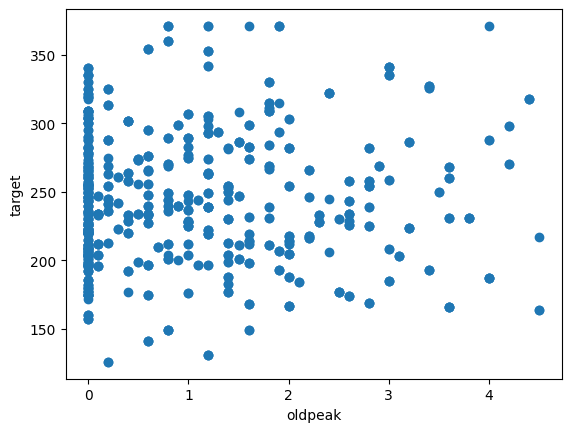

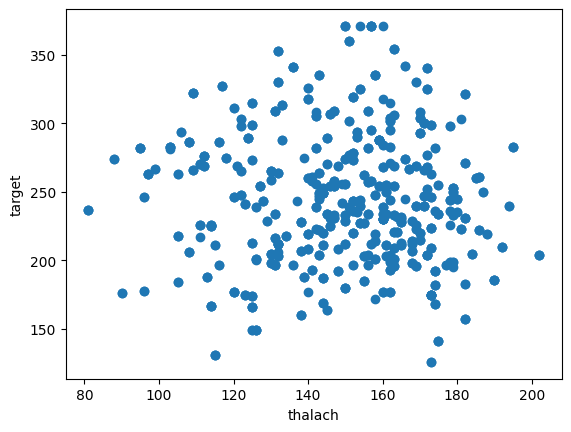

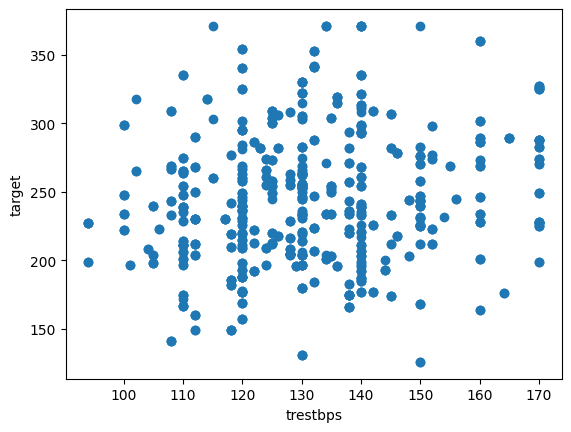

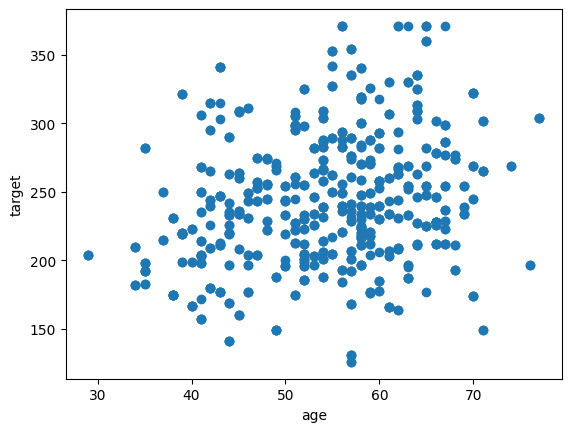

In [ ]:
for i in X_train.columns:
  plt.scatter(X_train[i],y_train)
  plt.xlabel(i)
  plt.ylabel('target')
  plt.show()

In [31]:


# Calculate metrics
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Accuracy: {r2}")

Mean Absolute Error (MAE): 39.769907502061045
Mean Squared Error (MSE): 2420.547043661126
Root Mean Squared Error (RMSE): 49.19905531268996
Accuracy: -0.0004182248887689699


In [90]:
from sklearn.neighbors import KNeighborsRegressor

X=final_df.drop('chol', axis=1)
y=final_df['chol']

X_train,X_test,y_train,y_test=train_test(X,y)

# Use KNN regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Calculate metrics for KNN
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, knn_predictions)

# Print the metrics for KNN
print(f"KNN Mean Absolute Error (MAE): {knn_mae}")
print(f"KNN Mean Squared Error (MSE): {knn_mse}")
print(f"KNN Root Mean Squared Error (RMSE): {knn_rmse}")
print(f"KNN Accuracy: {knn_r2}")

KNN Mean Absolute Error (MAE): 31.056585365853657
KNN Mean Squared Error (MSE): 1494.064975609756
KNN Root Mean Squared Error (RMSE): 38.653136685264705
KNN Accuracy: 0.38249916080654


the BELOW accuracies are obtained on data that has been scaled using  minmax scaler. ABOVE are the accuracies done on data

# SCALING USING MINMAXSCALER

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_num_df=num_df.copy()
scaled_num_df[['age','trestbps','chol','thalach','oldpeak']]= scaler.fit_transform(num_df[['age','trestbps','chol','thalach','oldpeak']])

StandardScaling

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()
std_scaled_num_df=num_df.copy()

std_scaled_num_df[['age','trestbps','chol','thalach','oldpeak']]= std_scaler.fit_transform(num_df[['age','trestbps','chol','thalach','oldpeak']])

In [61]:
scaled_num_df

,age,trestbps,chol,thalach,oldpeak
0,0.479167,0.407895,0.351020,0.719008,0.222222
1,0.500000,0.605263,0.314286,0.611570,0.688889
2,0.854167,0.671053,0.195918,0.363636,0.577778
3,0.666667,0.710526,0.314286,0.661157,0.000000
4,0.687500,0.578947,0.685714,0.206612,0.422222
...,...,...,...,...,...
1020,0.625000,0.605263,0.387755,0.685950,0.000000
1021,0.645833,0.407895,0.538776,0.495868,0.622222
1022,0.375000,0.210526,0.608163,0.305785,0.222222
1023,0.437500,0.210526,0.522449,0.644628,0.000000


In [37]:
model= LinearRegression()
final_df=pd.concat([num_df['age'],scaled_num_df.drop(['age'],axis=1),cat_df,target],axis=1)

X=final_df[['oldpeak','thalach','trestbps','age']] # target is cholestrol level
#X=final_df.drop('chol', axis=1)
y=final_df['chol']

X_train,X_test,y_train,y_test=train_test(X,y)

model.fit(X_train,y_train)

prediction=model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Accuracy: {r2}")

Mean Absolute Error (MAE): 0.16232615306963694
Mean Squared Error (MSE): 0.040325648374196194
Root Mean Squared Error (RMSE): 0.20081247066404068
Accuracy: -0.0004182248887689699


In [71]:
final_df=pd.concat([num_df['age'],scaled_num_df.drop(['age'],axis=1),cat_df,target],axis=1)

X=final_df.drop('chol', axis=1)
y=final_df['chol']

X_train,X_test,y_train,y_test=train_test(X,y)

In [63]:
from sklearn.neighbors import KNeighborsRegressor
final_df=pd.concat([num_df['age'],scaled_num_df.drop(['age'],axis=1),cat_df,target],axis=1)

X=final_df.drop('chol', axis=1)
y=final_df['chol']

X_train,X_test,y_train,y_test=train_test(X,y)
# Use KNN regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)
sc_knn_predictions = knn_model.predict(X_test)

# Calculate metrics for KNN
sc_knn_mae = mean_absolute_error(y_test, sc_knn_predictions)
sc_knn_mse = mean_squared_error(y_test, sc_knn_predictions)
sc_knn_rmse = np.sqrt(sc_knn_mse)
sc_knn_r2 = r2_score(y_test, sc_knn_predictions)

# Print the metrics for KNN
print(f"KNN Mean Absolute Error (MAE): {sc_knn_mae}")
print(f"KNN Mean Squared Error (MSE): {sc_knn_mse}")
print(f"KNN Root Mean Squared Error (RMSE): {sc_knn_rmse}")
print(f"KNN Accuracy: {sc_knn_r2}")

KNN Mean Absolute Error (MAE): 0.13224091587854656
KNN Mean Squared Error (MSE): 0.03262767017807621
KNN Root Mean Squared Error (RMSE): 0.18063131007130578
KNN Accuracy: 0.19055694829958536


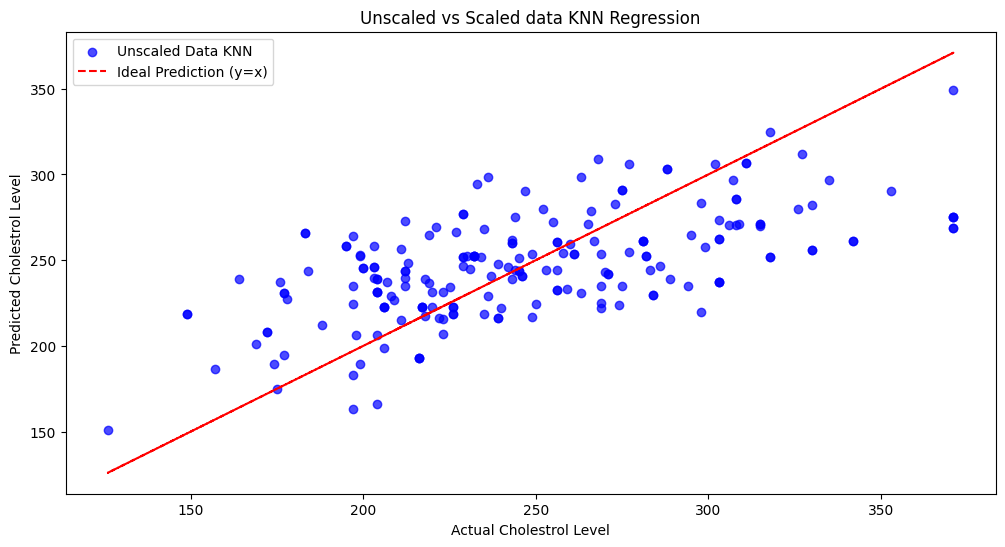

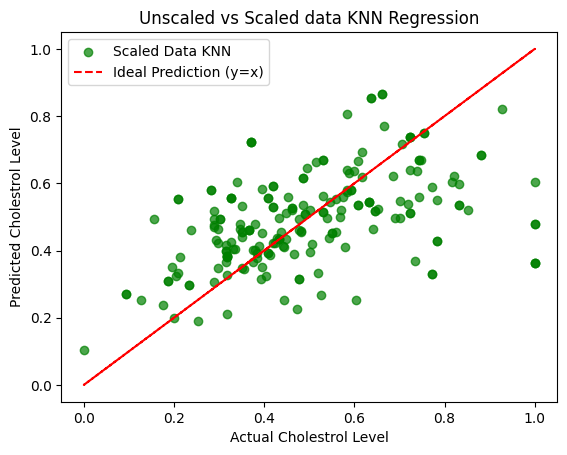

In [75]:
plt.figure(figsize=(12,6))
plt.scatter(unscaled_y_test,knn_predictions, label= "Unscaled Data KNN", color='blue',alpha=0.7)
plt.plot(unscaled_y_test,unscaled_y_test,color='red',linestyle='--',label='Ideal Prediction (y=x)')
plt.xlabel('Actual Cholestrol Level')
plt.ylabel('Predicted Cholestrol Level')
plt.title('Unscaled vs Scaled data KNN Regression')
plt.legend()
plt.show()

plt.scatter(y_test,sc_knn_predictions, label= "Scaled Data KNN", color='green',alpha=0.7)
plt.plot(y_test,y_test,color='red',linestyle='--',label='Ideal Prediction (y=x)')
plt.xlabel('Actual Cholestrol Level')
plt.ylabel('Predicted Cholestrol Level')
plt.title('Unscaled vs Scaled data KNN Regression')
plt.legend()
plt.show()

Even though the unscaled data trained knn has more accuracy, the prediction values seems to be more alinged with true values when model is trained on scaled data despite the relatively lower accuracy. Hence lets see if there is any overfitting or underfitting

Text(0, 0.5, 'Residuals')

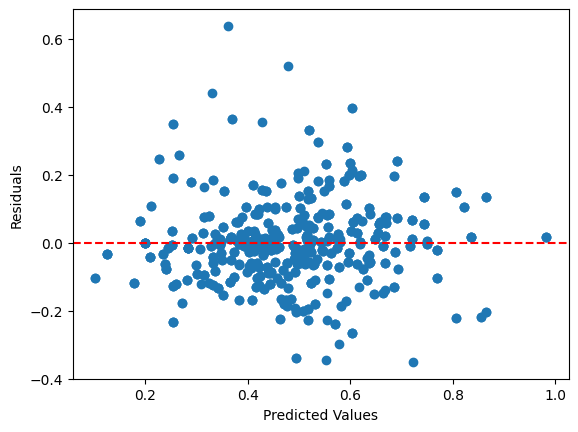

In [79]:
#scaled data on knn
y_train_pred=knn_model.predict(X_train)

scaled_mse=mean_squared_error(y_train,y_train_pred)
scaled_mae=mean_absolute_error(y_train,y_train_pred)
scaled_r2=r2_score(y_train,y_train_pred)

scaled_residuals=y_train-y_train_pred

plt.scatter(y_train_pred,scaled_residuals)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

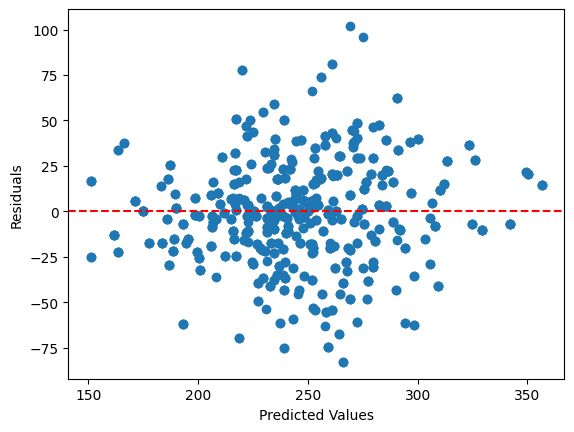

In [91]:
#unscaled data on knn

y_train_pred=knn_model.predict(X_train)

unscaled_mse=mean_squared_error(y_train,y_train_pred)
unscaled_mae=mean_absolute_error(y_train,y_train_pred)
unscaled_r2=r2_score(y_train,y_train_pred)
print(f"KNN Accuracy Unscaled Training data: {unscaled_r2}")
unscaled_residuals=y_train-y_train_pred

plt.scatter(y_train_pred,unscaled_residuals)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

In [92]:
print(f"KNN Accuracy Unscaled Training data: {unscaled_r2}")
print(f"KNN Accuracy Scaled Trainng data: {scaled_r2}")

KNN Accuracy Unscaled Training data: 0.661252245442064
KNN Accuracy Scaled Trainng data: 0.6335110875093956
